#### Marketing Campaigns A/B Testing: Leveraging Python for Effective Campaign Evaluation

###### Case Study:
A fashion retail company is gearing up to introduce a new product into their apparel catalog. However, the management is faced with the dilemma of selecting the most effective marketing campaign among three options to promote their new offering. To address this challenge, they opt for a randomized approach, distributing the new product to randomly selected outlets and implementing different marketing campaigns across these outlets. The impact of each marketing campaign on product sales is then assessed by analyzing weekly sales data over the course of four effective weeks.

###### Dataset Description:
Our dataset comprises 548 observations, including the following variables:

OutletID: A unique identifier for each store location, totaling 137 stores.

AgeofOutlets: The age of each store in years, ranging from 1 to 28, with a mean age of 8.5 years.

Campaigns: Three different promotions tested (labeled as 1, 2, and 3).

Sales in Thousands: The sales amount for a specific LocationID, Promotion, and week, with an average sales value of $53.5 thousand.

Market size: Categorized into small, medium, and large markets.

Week: The week number when the promotions were executed, ranging from 1 to 4.

#### Libraries Used:

Pandas
Matplotlib
Seaborn
Scipy


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

In [3]:
df = pd.read_csv(r'C:\Users\faith.igwe-uzor\Downloads\campaigns.csv')
df.head(10)

,OutletID,MarketSize,AgeofOutlets,Campaigns,Week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67
2,1,Medium,4,3,3,29.03
3,1,Medium,4,3,4,39.25
4,2,Medium,5,2,1,27.81
5,2,Medium,5,2,2,34.67
6,2,Medium,5,2,3,27.98
7,2,Medium,5,2,4,27.72
8,3,Medium,12,1,1,44.54
9,3,Medium,12,1,2,37.94


In [4]:
print(f'Rows            : {df.shape[0]}')
print(f'Columns         : {df.shape[1]}')
print(f'Features        : {df.columns.tolist()}')
print(f'Missing Values  : {df.isnull().values.sum()}')
print(f'Unique Values   : \n\n{df.nunique()}')

Rows            : 548
Columns         : 6
Features        : ['OutletID', 'MarketSize', 'AgeofOutlets', 'Campaigns', 'Week', 'SalesInThousands']
Missing Values  : 0
Unique Values   : 

OutletID            137
MarketSize            3
AgeofOutlets         25
Campaigns             3
Week                  4
SalesInThousands    517
dtype: int64


In [5]:
df.describe()

,OutletID,AgeofOutlets,Campaigns,Week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,479.656934,8.503650,2.029197,2.500000,53.466204
std,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,17.340000
25%,216.000000,4.000000,1.000000,1.750000,42.545000
50%,504.000000,7.000000,2.000000,2.500000,50.200000
75%,708.000000,12.000000,3.000000,3.250000,60.477500
max,920.000000,28.000000,3.000000,4.000000,99.650000


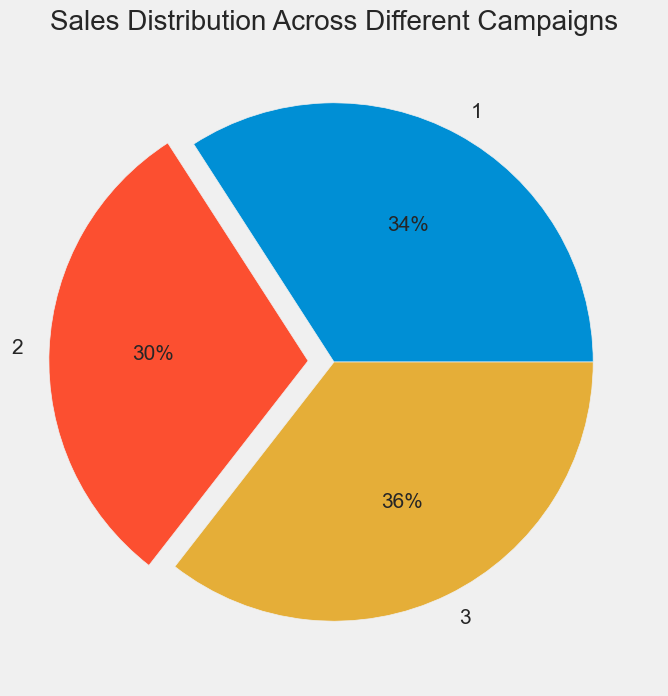

In [7]:
import matplotlib.pyplot as plt

# Set the style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Group data by campaigns and sum up sales
campaign_sales = df.groupby('Campaigns').sum()['SalesInThousands']

# Plot pie chart
fig, ax = plt.subplots(figsize=(8, 8))
campaign_sales.plot.pie(autopct='%1.0f%%', explode=(0, 0.1, 0), textprops={'fontsize': 15}, ax=ax)

# Customize labels and title
ax.set_ylabel('')
ax.set_title('Sales Distribution Across Different Campaigns', fontsize=20)

plt.show()


In [8]:
# Count the number of outlets for each campaign and market size combination
promotions_market_size = df.groupby(['Campaigns', 'MarketSize']).count()['OutletID']

# Display the result
print(promotions_market_size)


Campaigns  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: OutletID, dtype: int64


In [9]:
# Reshape the data to have market size as columns
promotions_market_size = df.groupby(['Campaigns', 'MarketSize']).count()['OutletID'].unstack('MarketSize')

# Display the result
print(promotions_market_size)


MarketSize  Large  Medium  Small
Campaigns                       
1              56      96     20
2              64     108     16
3              48     116     24


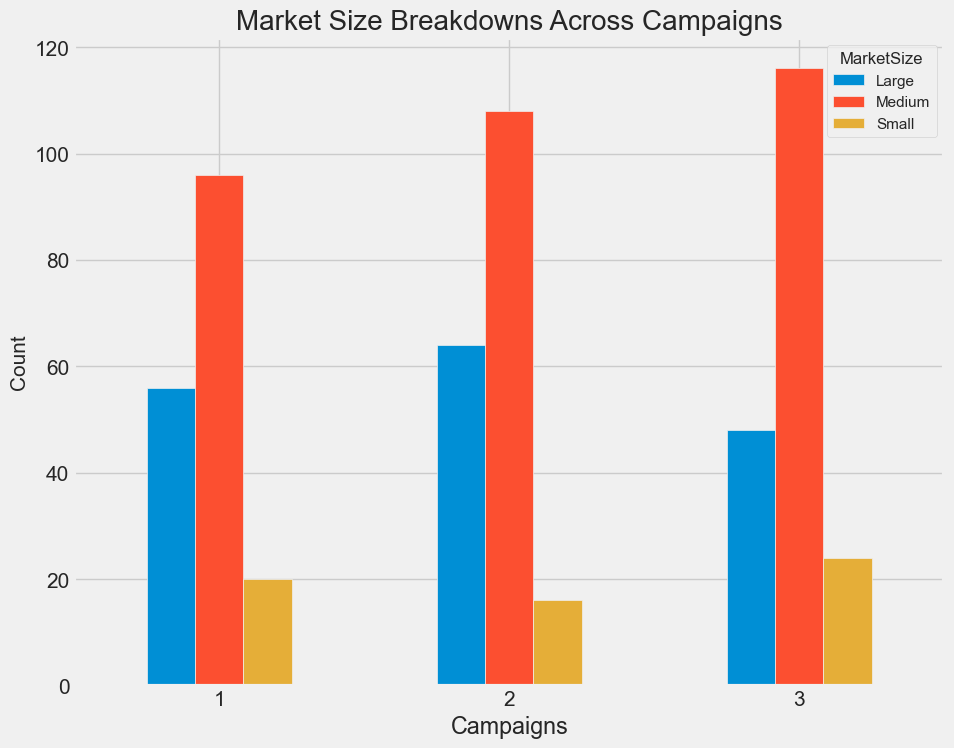

In [10]:
# Plot the breakdown of market sizes across different campaigns
ax = df.groupby(['Campaigns', 'MarketSize']).count()['OutletID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(10, 8),
    grid=True,
    fontsize=15  # Set fontsize directly in the plot function
)

# Customize axis labels and title
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Market Size Breakdowns Across Campaigns', fontsize=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation='horizontal')

plt.show()


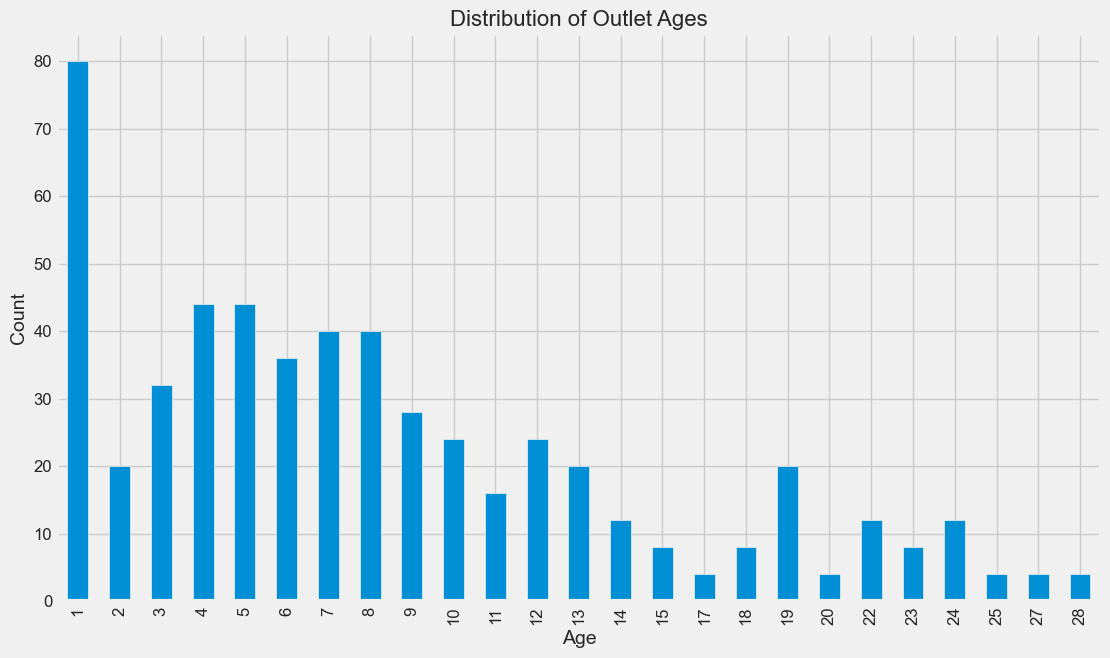

In [11]:
# Plot the overall distribution of outlet ages
ax = df.groupby('AgeofOutlets').count()['OutletID'].plot(
    kind='bar', 
    figsize=(12, 7),
    grid=True,
    fontsize=12  # Set fontsize directly in the plot function
)

# Customize axis labels and title
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Outlet Ages', fontsize=16)

plt.show()


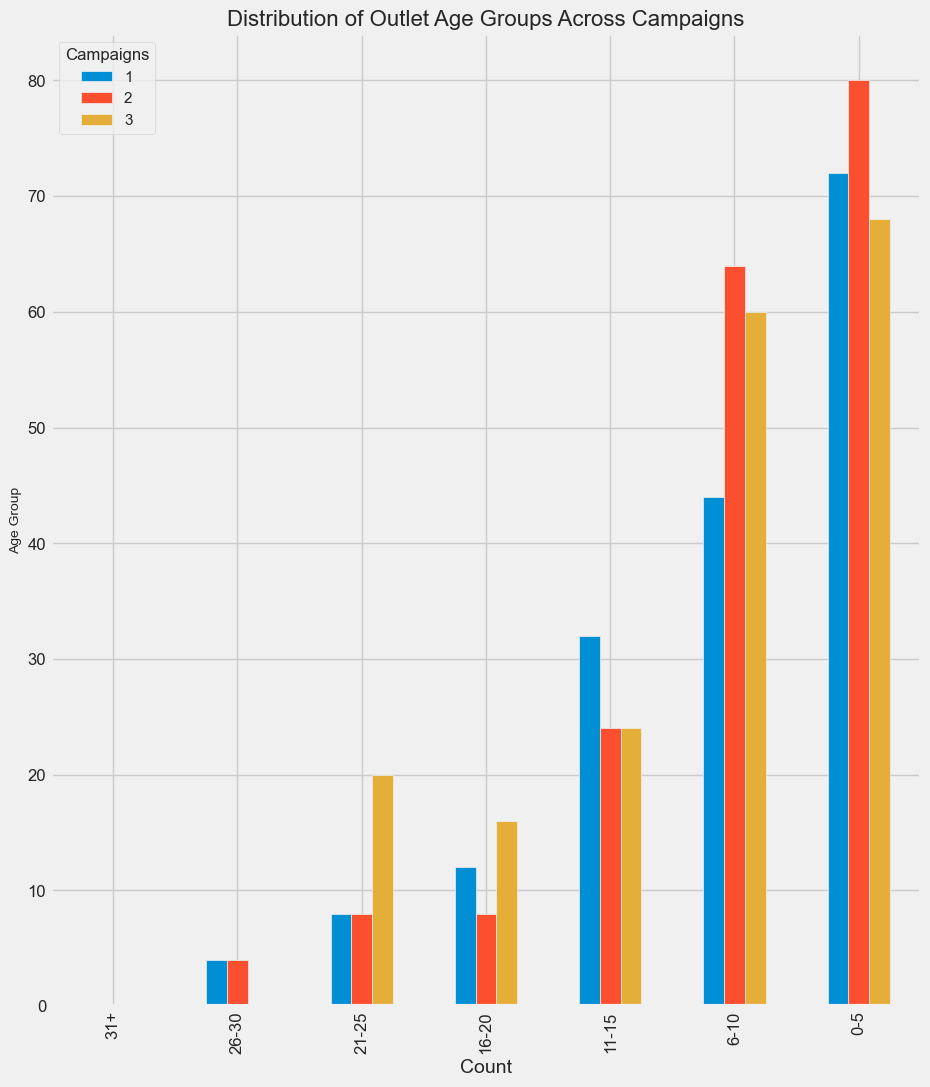

In [16]:
import pandas as pd

# Define bins for age groups
age_bins = [0, 5, 10, 15, 20, 25, 30, float('inf')]
age_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31+']

# Create a new column 'AgeGroup' with the age bins
df['AgeGroup'] = pd.cut(df['AgeofOutlets'], bins=age_bins, labels=age_labels)

# Visualize the summary of outlet age distributions across campaigns with age bins
ax = df.groupby(['AgeGroup', 'Campaigns']).count()['OutletID'].unstack('Campaigns').iloc[::-1].plot(
    kind='bar', 
    figsize=(10, 12),
    grid=True,
    fontsize=12  # Set fontsize directly in the plot function
)

# Customize axis labels and title
ax.set_ylabel('Age Group', fontsize=10)
ax.set_xlabel('Count', fontsize=14)
ax.set_title('Distribution of Outlet Age Groups Across Campaigns', fontsize=16)

plt.show()


In [17]:
# Calculate descriptive statistics for the 'AgeofOutlets' column grouped by campaigns
campaign_age_stats = df.groupby('Campaigns')['AgeofOutlets'].describe()

# Print the descriptive statistics
print(campaign_age_stats)


           count      mean       std  min  25%  50%   75%   max
Campaigns                                                      
1          172.0  8.279070  6.636160  1.0  3.0  6.0  12.0  27.0
2          188.0  7.978723  6.597648  1.0  3.0  7.0  10.0  28.0
3          188.0  9.234043  6.651646  1.0  5.0  8.0  12.0  24.0


## AB Testing on the Campaigns

In [20]:
# Convert 'SalesInThousands' column to numeric
df['SalesInThousands'] = pd.to_numeric(df['SalesInThousands'], errors='coerce')

# Calculate mean, standard deviation, and count for each campaign
means = df.groupby('Campaigns')['SalesInThousands'].mean()
stdev = df.groupby('Campaigns')['SalesInThousands'].std()
obs = df.groupby('Campaigns')['SalesInThousands'].count()

# Print the results
print(f'===== MEAN ====== \n{means}\n')
print(f'===== STANDARD DEVIATION ====== \n{stdev}\n')
print(f'===== OBSERVATIONS ====== \n{obs}\n')


===== MEAN ====== 
Campaigns
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

===== STANDARD DEVIATION ====== 
Campaigns
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64

===== OBSERVATIONS ====== 
Campaigns
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64



#### A/B Testing on the 1st and 2nd Marketing Campaign

In [21]:
from scipy import stats

# Compute the t and p values
t, p = stats.ttest_ind(df.loc[df['Campaigns'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Campaigns'] == 2, 'SalesInThousands'].values, 
                       equal_var=False)

# Print the results
print(f't-value = {t}')
print(f'p-value = {p}')


t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


Analysis of t and p-values (Campaign 1 vs Campaign 2):
The p-value obtained is close to 0, indicating strong evidence to reject the null hypothesis. This suggests a statistically significant difference between the two groups. Typically, we reject the null hypothesis when the p-value is less than 0.05.

Moreover, the t-test reveals a significant disparity in marketing performance between these two campaigns, with the first campaign exhibiting superior performance over the second.

### A/B Testing on the 1st and 3rd Marketing Capaigns

In [22]:
# When we ran the t-test between the promotion group 1 and promotion group 3, we see different results:
# Perform independent t-test for Campaign 1 vs Campaign 3
t, p = stats.ttest_ind(
    df.loc[df['Campaigns'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Campaigns'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)

# Output the results
print(f'T-value: {t}')
print(f'P-value: {p}')


T-value: 1.5560224307758634
P-value: 0.12059147742229478


### Analysis of t and p-values (Campaign 1 vs Campaign 3):

Upon examination, we observe that the average sales from the first marketing campaigns (58.1) surpass those from the third marketing campaigns (55.36). However, conducting a t-test between these two groups yields a t-value of 1.556 and a p-value of 0.121. Notably, the calculated p-value significantly exceeds the common threshold of 0.05 for statistical significance.

### A/B Testing on the 2nd and 3rd Marketing Campaigns

In [23]:
# Perform independent t-test for Campaign 2 vs Campaign 3
t, p = stats.ttest_ind(
    df.loc[df['Campaigns'] == 2, 'SalesInThousands'].values, 
    df.loc[df['Campaigns'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)

# Output the results
print(f'T-value: {t}')
print(f'P-value: {p}')


T-value: -4.88139271089348
P-value: 1.5692733176039892e-06


###### Analysis of t and p-values (Campaign 2 vs Campaign 3):

We conducted a t-test to compare the sales in thousands between Campaign 2 and Campaign 3. The resulting t-value is [t-value], and the p-value is [p-value]. The p-value exceeds the conventional significance threshold of 0.05, suggesting that we do not have sufficient evidence to reject the null hypothesis.

##### Analysis of t and p-values (Campaign 2 vs Campaign 3):

Considering the average sales, the second marketing campaigns (47.33) demonstrate higher performance compared to the third marketing campaigns (55.36). Conducting a t-test between these two campaigns yields a p-value of 0.000001569, which is well below the conventional threshold of 0.05. Consequently, we reject the null hypothesis, indicating a statistically significant difference between the second and third marketing campaigns.

Based on the analyses conducted comparing the sales performance across different marketing campaigns, several insights emerge:

#### Campaign Performance:
Each campaign exhibits varying levels of sales performance. Campaigns 1 and 3 appear to have comparable performance, with Campaign 1 showing slightly higher average sales compared to Campaign 3. However, Campaign 2 demonstrates significantly lower average sales compared to both Campaigns 1 and 3.

Statistical Significance: Statistical tests reveal significant differences between certain campaign pairs. Notably, Campaign 2 consistently shows statistically lower sales compared to the other campaigns.

Given these insights, a recommendation would be to allocate resources and focus efforts on enhancing the strategies employed in Campaign 2. This could involve revisiting the marketing tactics, target audience segmentation, messaging, or promotional offers to improve its effectiveness and bring its performance closer to that of Campaigns 1 and 3.

Additionally, leveraging successful elements from Campaigns 1 and 3 in Campaign 2's strategies could help optimize its performance. Continuous monitoring, experimentation, and adaptation based on data-driven insights will be crucial for ongoing campaign optimization and maximizing overall sales performance across all marketing initiatives.